# import library

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

In [2]:
diabetes = datasets.load_diabetes()

print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


In [3]:
print(diabetes.target[:10])

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310.]


In [4]:
print(diabetes.data[:5])

[[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990842 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06832974 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567061 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286377 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665645  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02269202 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187235  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03199144 -0.04664087]]


# Scatter Plot
// import matplotlib.pyplot as plt

Text(0, 0.5, 'y')

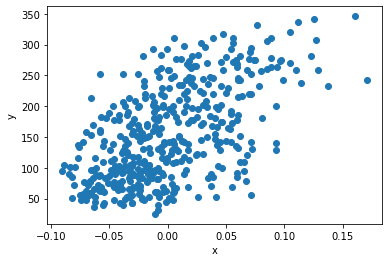

In [5]:
plt.scatter(diabetes.data[:,2], diabetes.target)
plt.xlabel('x')
plt.ylabel('y')

# Class SingleNeuron

In [6]:
class SingleNeuron(object):

    def __init__(self):
        self._w = 0     # 가중치 w
        self._b = 0     # 바이어스 b
        self._x = 0     # 입력값 x

    def set_params(self, w, b):
        """가중치와 바이어스를 저장합니다."""
        self._w = w
        self._b = b

    def forpass(self, x):
        """정방향 수식 w * x + b 를 계산하고 결과를 리턴합니다."""
        self._x = x
        _y_hat = self._w * self._x + self._b
        return _y_hat
    def backprop(self, err):
        """에러를 입력받아 가중치와 바이어스의 변화율을 곱하고 평균을 낸 후 감쇠된 변경량을 저장합니다."""
        m = len(self._x)
        self._w_grad = 0.1 * np.sum(err * self._x) / m
        self._b_grad = 0.1 * np.sum(err * 1) / m

    def update_grad(self):
        """계산된 파라메타의 변경량을 업데이트하여 새로운 파라메타를 셋팅합니다."""
        self.set_params(self._w + self._w_grad, self._b + self._b_grad)

In [7]:
n1 = SingleNeuron()
n1.set_params(5, 1)   # w, b 를 5, 1 로 셋팅
print(n1.forpass(3))  # x 에 3 을 입력

16


In [8]:
n1.set_params(6, 1)   # w, b 를 6, 1 로 셋팅
print(n1.forpass(3))  # x 에 3 을 입력

19


In [9]:
n1.set_params(5, 1) # w, b 를 5, 1 로 셋팅
print(n1.forpass(4)) # x 에 4 을 입력

21


In [10]:
n1.set_params(5, 2) # w, b 를 5, 2 로 셋팅
print(n1.forpass(3)) # x 에 3 을 입력

17


In [11]:
n1.set_params(5, 0) # w, b 를 5, 0 으로 셋팅
print(n1.forpass(3)) # x 에 4 을 입력

15


In [12]:
n1.set_params(5, 1)
for i in range(30000):
    y_hat = n1.forpass(diabetes.data[:, 2])
    error = diabetes.target - y_hat
    n1.backprop(error)
    n1.update_grad()
print('Final W', n1._w)
print('Final b', n1._b)

Final W 948.3707777294869
Final b 152.13348416289656


Text(0, 0.5, 'y')

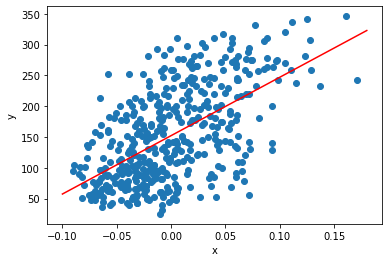

In [13]:
# xNDArray 값을 만들기 위해 -0.1 ~ 0.18 사이의 배열을 만듬.
xNDArray = np.linspace(-0.1, 0.18)
# y = ax + b의 1차 방정식 그래프 그림. 
yNDArray = n1._w * xNDArray + n1._b
plt.scatter(diabetes.data[:,2], diabetes.target)
# plt.plot([x1, x2], [y1, y2]) == plt.plot(xNDArray, yNDArray) 
plt.plot(xNDArray, yNDArray, label = "linear", color = "r")
plt.xlabel('x')
plt.ylabel('y')